<a href="https://colab.research.google.com/github/lidgarbar/Breast-Cancer-Model-Prediction/blob/main/ModelNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Prediction Model 
> Authors: Juan Sánchez Moreno and Lidia García Barragán

## Setup and imports

In [2]:
!pip install tensorflow opencv-python matplotlib pandas scikit-learn tqdm

In [3]:
import os
import tensorflow as tf
from PIL import Image
import pandas as pd
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from tensorflow.keras.utils import load_img , img_to_array
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
data_dir='data'
dir_benign=os.path.join(data_dir,'benign')
dir_malignant=os.path.join(data_dir,'malignant')
dir_normal=os.path.join(data_dir,'normal')

size_benign=437
size_malignant=209
size_normal=132

def cargaX(tipo,dir_tipo,tamaño):
    images = []
    for i in range(tamaño):
        dir= tipo+' ('+str(i+1)+').png'
        img = load_img(os.path.join(dir_tipo,dir))
        img= img.resize((332, 332))
        img = img_to_array(img)
        img = img/255
        images.append(img)
    X_benign = np.array(images)
    return X_benign


In [6]:
X_benign = cargaX('benign',dir_benign,size_benign)
X_malignant=cargaX('malignant',dir_malignant,size_malignant)
X_normal=cargaX('normal',dir_normal,size_normal)
X_benign_train=[]
X_benign_test = []
X_malignant_train = []
X_malignant_test = []
X_normal_train = []
X_normal_test = []

In [7]:


#X_benign_train= X_benign[0:to
    

def split_y(lista,porcentaje,lista_train,lista_test):
    tam_train= int(len(lista)*porcentaje)
    lista_train= lista[0:tam_train]
    lista_test= lista[tam_train:len(lista)]
    return (lista_train,lista_test)

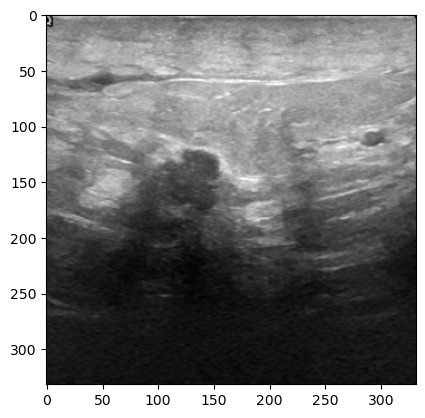

In [8]:
plt.imshow(X_malignant[8])

In [9]:

def cargaImagenes(tipo,dir_tipo,tamaño,lista):
    images_B=[]

    for i in range(tamaño):
        inputImages_B = []
        inputImages_B.append(lista[i])
        dir= tipo+' ('+str(i+1)+')_mask.png'
        dir1=tipo+' ('+str(i+1)+')_mask_1.png'
        

        img = load_img(os.path.join(dir_tipo,dir))
        img= img.resize((332, 332))
        img = img_to_array(img)
        img = img/255
        inputImages_B.append(img)

        outputImage_B=np.concatenate((inputImages_B[0],inputImages_B[1]),axis=1)

    
        images_B.append(outputImage_B)
        if(os.path.exists(os.path.join(dir_tipo,dir1))) :
            img1 = load_img(os.path.join(dir_tipo,dir1))
            img1= img1.resize((332, 332))
            img1 = img_to_array(img1)
            img1 = img1/255
            inputImages_B[1]=img1
            outputImage_B1=np.concatenate((inputImages_B[0],inputImages_B[1]),axis=1)
            images_B.append(outputImage_B1)
        



    images_B=np.array(images_B)
    return images_B

In [10]:
images_B=cargaImagenes('benign',dir_benign,size_benign,X_benign)
images_M=cargaImagenes('malignant',dir_malignant,size_malignant,X_malignant)
images_N=cargaImagenes('normal',dir_normal,size_normal,X_normal)



In [11]:
def split_images(lista,porcentaje,lista_train,lista_test):
    tam_train= int(len(lista)*porcentaje)
    lista_train= lista[0:tam_train]
    lista_test= lista[tam_train:len(lista)]
    return (lista_train,lista_test)


In [12]:
X_benign_train,X_benign_test= split_images(images_B,0.7,X_benign_train,X_benign_test)
X_malignant_train,X_malignant_test= split_images(images_M,0.7,X_malignant_train,X_malignant_test)
X_normal_train,X_normal_test= split_images(images_N,0.7,X_normal_train,X_normal_test)
print(len(X_benign_train),len(X_benign_test))
print(len(X_malignant_train),len(X_malignant_test))
print(len(X_normal_train),len(X_normal_test))

317 136
147 63
92 40


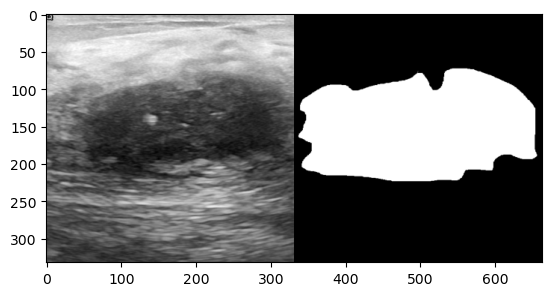

In [13]:
plt.imshow(images_M[0])

Ahora toca hacer una lista (uniendo las tres anteriores) de tuplas de dos elementos: el primero corresponde a la imagen y el segundo corresponde al tipo de tumor (maligno=M, benigno=B, normal=N)

In [14]:
typesTrain=[]
typesTest=[]
imagesTrain=[]
imagesTest=[]
def addAll(tipo,listatrain,listatest):
    for i in listatrain:
        typesTrain.append(tipo)
        imagesTrain.append(i)
        
    for i in listatest:
        typesTest.append(tipo)
        imagesTest.append(i)    
    
addAll(0,X_benign_train,X_benign_test)
addAll(1,X_malignant_train,X_malignant_test)
addAll(2,X_normal_train,X_normal_test)

typesTrain=np.array(typesTrain).reshape(-1,)
typesTest=np.array(typesTest).reshape(-1,)
imagesTrain=np.array(imagesTrain)
imagesTest=np.array(imagesTest)


In [15]:
imagesTrain.shape
#imagesAll.shape

(556, 332, 664, 3)

0


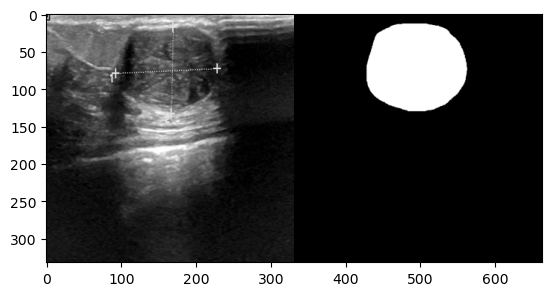

In [16]:
print(typesTrain[288])
plt.imshow(imagesTrain[288])

In [17]:
cnn = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(332, 664, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
cnn.fit(imagesTrain, typesTrain, epochs=3)


Epoch 1/3
18/18 [==============================] - 89s 5s/step - loss: 7.0066 - accuracy: 0.4784
Epoch 2/3
18/18 [==============================] - 83s 5s/step - loss: 0.7743 - accuracy: 0.6727
Epoch 3/3
18/18 [==============================] - 76s 4s/step - loss: 0.2508 - accuracy: 0.9245


In [20]:
y_pred_cnn = cnn.predict(imagesTrain)
y_pred_classes_cnn = [np.argmax(element) for element in y_pred_cnn]

print("Classification Report: \n", classification_report(typesTrain, y_pred_classes_cnn))

18/18 [==============================] - 19s 1s/step
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      0.99      1.00       147
           2       1.00      1.00      1.00        92

    accuracy                           1.00       556
   macro avg       1.00      1.00      1.00       556
weighted avg       1.00      1.00      1.00       556



In [21]:
cnn.evaluate(imagesTrain,typesTrain)

18/18 [==============================] - 21s 1s/step - loss: 0.0593 - accuracy: 0.9982


[0.05932772904634476, 0.9982014298439026]

In [22]:
y_pred_test = cnn.predict(imagesTest)
y_pred_classes_test = [np.argmax(element) for element in y_pred_test]

print("Classification Report: \n", classification_report(typesTest, y_pred_classes_test))

8/8 [==============================] - 7s 891ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.76      0.78       136
           1       0.56      0.56      0.56        63
           2       0.87      1.00      0.93        40

    accuracy                           0.75       239
   macro avg       0.74      0.77      0.76       239
weighted avg       0.75      0.75      0.75       239



In [23]:
cnn.evaluate(imagesTest,typesTest)

8/8 [==============================] - 8s 940ms/step - loss: 0.7366 - accuracy: 0.7490


[0.7366413474082947, 0.7489539980888367]

In [51]:
# We extract one image from our data to test the model.
# The prediction has to be 0, which is the type benign.
image1= imagesTest[0:1]
print(typesTest[0:1])


[0]


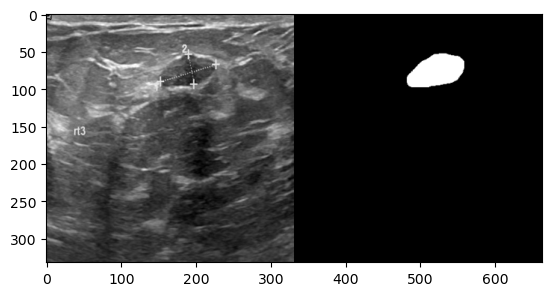

In [52]:
#Here we can see the image to be tested.

plt.imshow(imagesTest[0])

In [53]:
#We insert the image in the model to get the prediction and we print it to see if the prediction is correct.
prediction1= cnn.predict(image1)
print(np.argmax(prediction1))

1/1 [==============================] - 0s 70ms/step
0
